# Simple Chatbot Using LangGraph

In [1]:
from typing_extensions import TypedDict
from langgraph.graph import StateGraph, START, END

In [2]:
### Reducers
from typing import Annotated
from langgraph.graph import add_messages

In [3]:
class State(TypedDict):
    messages: Annotated[list, add_messages]

In [4]:
import os 
from dotenv import load_dotenv
load_dotenv()

True

In [5]:
os.environ["OPENAI_API_KEY"]=os.getenv("OPENAI_API_KEY")
os.environ['GROQ_API_KEY'] = os.getenv('GROQ_API_KEY')

In [ ]:
from langchain_openai import ChatOpenAI
llm=ChatOpenAI(model="gpt-4o")
llm.invoke("Hello")

In [6]:
from langchain_groq import ChatGroq
model = ChatGroq(model='qwen-qwq-32b')
model.invoke("Hello my name is Abubakar Saddiq.")

AIMessage(content='\n<think>\nOkay, so the user gave me their name, Abubakar Saddiq. I need to respond appropriately. Let me start by greeting them back. I should make sure to use their full name to be polite. Maybe say something like, "Hello Abubakar Saddiq, nice to meet you!" Then, I should ask them how I can assist them today. I want to keep it friendly and open-ended so they feel comfortable to ask anything. Let me check for any typos or errors. Hmm, looks good. Alright, that should work.\n</think>\n\nHello Abubakar Saddiq, nice to meet you! How can I assist you today? Feel free to ask me any questions or let me know if you need help with anything specific! 😊', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 158, 'prompt_tokens': 21, 'total_tokens': 179, 'completion_time': 0.365543411, 'prompt_time': 0.004684697, 'queue_time': 3.57958529, 'total_time': 0.370228108}, 'model_name': 'qwen-qwq-32b', 'system_fingerprint': 'fp_a91d9c2cfb', 'finish_reason': '

##### Creating Nodes and Edges

In [7]:
def mybot(state:State):
    return {"messages": model.invoke(state['messages'])}

In [8]:
graph = StateGraph(State)

graph.add_node("my_bot", mybot)

graph.add_edge(START, "my_bot")
graph.add_edge("my_bot", END)

In [9]:
### Compiling the Graph
graph_builder = graph.compile()

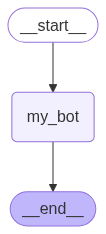

In [10]:
## Display
from IPython.display import Image, display
display(Image(graph_builder.get_graph().draw_mermaid_png()))

In [11]:
### Graph Invocation
graph_builder.invoke({"messages":"Hello, my name is Abubakar Saddiq."})

{'messages': [HumanMessage(content='Hello, my name is Abubakar Saddiq.', additional_kwargs={}, response_metadata={}, id='9c134536-43db-4129-a009-d49563e86e8a'),
  AIMessage(content="\n<think>\nOkay, the user introduced himself as Abubakar Saddiq. I should respond politely. Let me start by greeting him and thanking him for introducing himself. I should make sure to mention his name again to keep the conversation personal. Maybe ask him how I can assist him today. Keep it friendly and open-ended so he feels comfortable to ask anything. Let me check the response again to ensure it's natural and not too formal. Yep, that should work.\n</think>\n\nHello Abubakar Saddiq! Nice to meet you. How can I assist you today? Feel free to ask me any questions or let me know if you need help with anything specific. 😊", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 137, 'prompt_tokens': 22, 'total_tokens': 159, 'completion_time': 0.335102469, 'prompt_time': 0.003598945, '

In [12]:
### Streaming the Response

for event in graph_builder.stream({"messages":"Hello My name is KRish"}):
    print(event)

{'my_bot': {'messages': AIMessage(content='\n<think>\nOkay, the user wrote "Hello My name is KRish". I should start by greeting them back. Let me see... "Hello KRish!" That\'s friendly. Then maybe ask how they\'re doing today. Keep it open-ended so they can share more. I should make sure to use proper grammar and be welcoming. Let me check for any typos. Yep, looks good. Alright, that\'s the response.\n</think>\n\nHello KRish! Nice to meet you. How are you today? Feel free to ask me any questions or let me know if you need help with anything specific! 😊', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 123, 'prompt_tokens': 16, 'total_tokens': 139, 'completion_time': 0.284672118, 'prompt_time': 0.004586096, 'queue_time': 1.277771302, 'total_time': 0.289258214}, 'model_name': 'qwen-qwq-32b', 'system_fingerprint': 'fp_a91d9c2cfb', 'finish_reason': 'stop', 'logprobs': None}, id='run--64fb49e7-bf35-4e28-9634-5a7770a4307a-0', usage_metadata={'input_tokens': 16,